<a href="https://colab.research.google.com/github/ameralhomdy/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [1]:
# Your Work Here
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

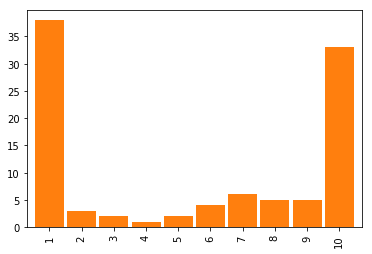

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

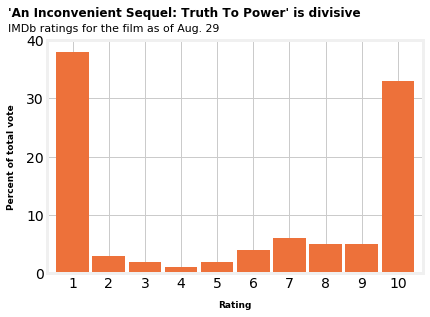

In [3]:
import matplotlib.pyplot as plt

# use the 538 stylesheet
plt.style.use('fivethirtyeight')

# generate the figure
fig = plt.figure()
fig.patch.set(facecolor='white')

# generate the axes for the plot
ax = fake.plot.bar(color="#ED713A", width=0.9)
ax.set(facecolor='white')

# There is more than one way to set a title on a graph
# fig.suptitle('test title')
# ax.set_title("title")
# If we want a really custom title 
# we can just use a text annotation and make it look like a title
ax.text(x=-1.8, y=44, s="'An Inconvenient Sequel: Truth To Power' is divisive", 
        fontweight='bold', fontsize=12);
ax.text(x=-1.8, y=41.5, s="IMDb ratings for the film as of Aug. 29", 
        fontsize=11)

# set the axis label
ax.set_ylabel("Percent of total vote", fontsize=9, fontweight='bold', labelpad=10)
ax.set_xlabel("Rating", fontsize=9, fontweight='bold', labelpad=10)

# fix our tick labels
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticks(range(0,50,10))
ax.set_yticklabels(range(0, 50, 10))

plt.show()

In [4]:
display(example)

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/steak-survey/steak-risk-survey.csv')

df.head()

,RespondentID,"Consider the following hypothetical situations: <br>In Lottery A, you have a 50% chance of success, with a payout of $100. <br>In Lottery B, you have a 90% chance of success, with a payout of $20. <br><br>Assuming you have $10 to bet, would you play Lottery A or Lottery B?",Do you ever smoke cigarettes?,Do you ever drink alcohol?,Do you ever gamble?,Have you ever been skydiving?,Do you ever drive above the speed limit?,Have you ever cheated on your significant other?,Do you eat steak?,How do you like your steak prepared?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.237566e+09,Lottery B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.234982e+09,Lottery A,No,Yes,No,No,No,No,Yes,Medium rare,Male,> 60,"$50,000 - $99,999",Some college or Associate degree,East North Central
3,3.234973e+09,Lottery A,No,Yes,Yes,No,Yes,Yes,Yes,Rare,Male,> 60,"$150,000+",Graduate degree,South Atlantic
4,3.234972e+09,Lottery B,Yes,Yes,Yes,No,Yes,Yes,Yes,Medium,Male,> 60,"$50,000 - $99,999",Bachelor degree,New England


In [34]:
df1 = df[['How do you like your steak prepared?']]
df1.head()

,How do you like your steak prepared?
0,Response
1,NaN
2,Medium rare
3,Rare
4,Medium


In [35]:
print(df1.shape)
df1.isnull().sum()

(551, 1)


How do you like your steak prepared?    118
dtype: int64

In [36]:
df2 = df1.dropna(axis='index')
df2.isnull().sum()
df2.head()

,How do you like your steak prepared?
0,Response
2,Medium rare
3,Rare
4,Medium
5,Medium


In [37]:
df3 = df2.drop([0], axis='index')
df3

,How do you like your steak prepared?
2,Medium rare
3,Rare
4,Medium
5,Medium
6,Medium rare
8,Medium rare
9,Medium
10,Medium rare
11,Medium rare
12,Medium rare


In [60]:
example = df3['How do you like your steak prepared?'].value_counts()
example

Medium rare    166
Medium         132
Medium Well     75
Well            36
Rare            23
Name: How do you like your steak prepared?, dtype: int64

In [47]:
# # df4 = df3.replace(('Rare', 1), ('Medium rare', 2), ('Well', 3), ('Medium Well', 4), 'Well', 5)
# # condition = {'Rare': 1, 'Medium rare': 2, 'Medium': 3, 'Medium Well': 4, 'Well': 5}
# # replace_all(df3['How do you like your steak prepared?'], condition)

# d = { "cat": "dog", "dog": "pig"}
# mySentence = "This is my cat and this is my dog."
# replace_all(mySentence, d)
# print(mySentence)

df4 = df3.replace(to_replace = ['Rare', 'Medium rare', 'Medium', 'Medium Well', 'Well'], value = [1, 2, 3, 4, 5])
df4.dtypes

How do you like your steak prepared?    int64
dtype: object

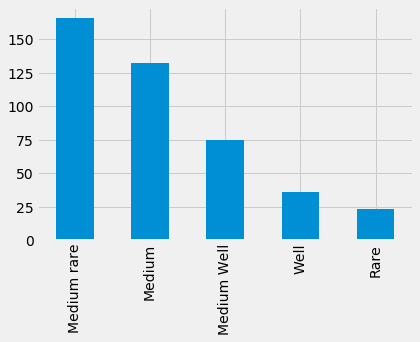

In [63]:
# bins = pd.cut(df4['How do you like your steak prepared?'], 5, )
# bins
example.plot(kind="bar")

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here